In [1]:
import numpy as np
import pandas as pd

In [2]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [5]:
import FinanceDataReader as fdr

In [6]:
fdr.__version__

'0.9.50'

In [7]:
pd.set_option("display.max_rows", 560)

[FinanceDataReader]

(https://github.com/FinanceData/FinanceDataReader/wiki/Users-Guide)

https://github.com/FinanceData/FinanceDataReader/wiki/Users-Guide

In [8]:
etf = fdr.StockListing("ETF/KR")

In [10]:
etf.head()

,Symbol,Name
0,069500,KODEX 200
1,357870,TIGER CD금리투자KIS(합성)
2,371460,TIGER 차이나전기차SOLACTIVE
3,423160,KODEX KOFR금리액티브(합성)
4,252670,KODEX 200선물인버스2X


<h3> 1.주가데이터를 불러옵니다.</h3>

In [11]:
df = fdr.DataReader('360750', '2020-08-01') #TIGER 미국S&P500

In [12]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-08-07,9774,9789,9716,9761,126092,NaN
2020-08-10,9754,9794,9749,9785,212309,0.002459
2020-08-11,9789,9799,9774,9795,83181,0.001022
2020-08-12,9730,9754,9692,9757,68040,-0.003880
2020-08-13,9834,9834,9789,9805,163224,0.004920


In [13]:
len(df)

623

<h3> 1.Trend 예측.</h3>

$\Large y_t = \beta_0 + \beta_{1}t +  e_t$

In [14]:
m_price = df['Close'].resample('M').ffill()

In [15]:
type(m_price)

pandas.core.series.Series

In [16]:
df1 = m_price.to_frame()

In [17]:
df1 = df1.reset_index()

In [18]:
T = list(range(1,len(df1)+1))

In [19]:
T

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [20]:
df1['T'] = pd.DataFrame(T, columns = ['T'])

In [21]:
df1.head()

,Date,Close,T
0,2020-08-31,10256,1
1,2020-09-30,9669,2
2,2020-10-31,9038,3
3,2020-11-30,9805,4
4,2020-12-31,10015,5


In [22]:
stock = ols("Close ~ T", data=df1).fit()

In [23]:
print(stock.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     42.20
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           4.12e-07
Time:                        15:43:13   Log-Likelihood:                -254.61
No. Observations:                  31   AIC:                             513.2
Df Residuals:                      29   BIC:                             516.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.025e+04    339.749     30.183      0.0

In [24]:
#그래프

In [25]:
X = df1['T']

In [26]:
ypred = stock.predict(X)
print(ypred)

0     10374.929435
1     10495.336290
2     10615.743145
3     10736.150000
4     10856.556855
5     10976.963710
6     11097.370565
7     11217.777419
8     11338.184274
9     11458.591129
10    11578.997984
11    11699.404839
12    11819.811694
13    11940.218548
14    12060.625403
15    12181.032258
16    12301.439113
17    12421.845968
18    12542.252823
19    12662.659677
20    12783.066532
21    12903.473387
22    13023.880242
23    13144.287097
24    13264.693952
25    13385.100806
26    13505.507661
27    13625.914516
28    13746.321371
29    13866.728226
30    13987.135081
dtype: float64


In [27]:
yactual = df1['Close']

In [28]:
df1['yym']=df1['Date'].dt.to_period('M')

In [29]:
df1['ypred'] = ypred

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


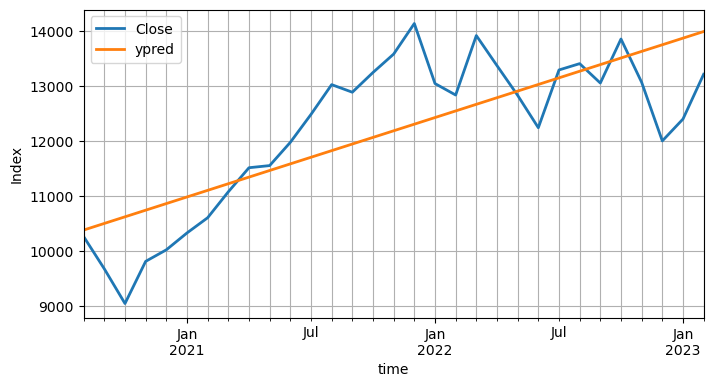

In [30]:
fig, ax = plt.subplots(nrows=1, figsize=(8, 4), sharex=True)
df1.plot(x = 'yym', y='Close', ax=ax)
df1.plot(x = 'yym', y='ypred',  ax=ax)
ax.set(xlabel="time", ylabel="Index")
ax.grid('on',  which='minor', axis='x' )
ax.grid('off', which='major', axis='x' )
plt.savefig("tsRegression01.png", dpi=150, bbox_inches='tight')
plt.show()